In [7]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os

In [8]:
# Turn off setting with copy warning
pd.set_option('mode.chained_assignment', None)

In [9]:
from notify_run import Notify

In [10]:
notify = Notify()

In [11]:
notify.register()

Endpoint: https://notify.run/chzoK60Ty9knRxsu
To subscribe, open: https://notify.run/c/chzoK60Ty9knRxsu
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

In [12]:
os.chdir('../data/interim')

In [13]:
os.listdir()

['joined data post-markdowns.csv',
 'joined data pre-markdowns.csv',
 '.gitkeep',
 'data post-eda.csv',
 'joined data full.csv']

### Generate Dummy Features

My approach is going to be dropping the markdown columns in order to have access to the entire data set for training.

In [14]:
# Loading full joined data as df
df = pd.read_csv('data post-eda.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,NaN,NaN,NaN,NaN,NaN,211.671989,7.838,2,151315,1,1


In [15]:
# Dropping markdown columns
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [16]:
# Show info of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  int64  
 10  Size          421570 non-null  int64  
 11  Month         421570 non-null  int64  
 12  Week          421570 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 41.8+ MB


Columns that should have dummy features encoded:
- Store
- Dept
- Type
- Month
- Week

In [17]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,Week
0,1,1,2010-01-10,20094.19,0,71.89,2.603,211.671989,7.838,2,151315,1,1
1,1,2,2010-01-10,45829.02,0,71.89,2.603,211.671989,7.838,2,151315,1,1
2,1,3,2010-01-10,9775.17,0,71.89,2.603,211.671989,7.838,2,151315,1,1
3,1,4,2010-01-10,34912.45,0,71.89,2.603,211.671989,7.838,2,151315,1,1
4,1,5,2010-01-10,23381.38,0,71.89,2.603,211.671989,7.838,2,151315,1,1


I plan to create 3 separate models. One for each of the different store types.

In [18]:
# Create dummy features
deptDummies = pd.get_dummies(df['Dept'], prefix='Dept', drop_first=True)
monthDummies = pd.get_dummies(df['Month'], prefix='Month', drop_first=True)
weekDummies = pd.get_dummies(df['Week'], prefix='Week', drop_first=True)

In [19]:
# Join dummy features onto dataframe
df = df.join([deptDummies, monthDummies, weekDummies])

In [20]:
# Drop original features
df.drop(columns=['Dept', 'Month', 'Week'], inplace=True)

In [21]:
# Split the data by 3 store types
df0 = df.loc[df.Type == 0]
df1 = df.loc[df.Type == 1]
df2 = df.loc[df.Type == 2]

In [22]:
# Drop Type and Date features
df0 = df0.drop(columns=['Type'])
df1 = df1.drop(columns=['Type'])
df2 = df2.drop(columns=['Type'])

In [23]:
# Create Store Dummy Features
storeDummies0 = pd.get_dummies(df0['Store'], prefix='Store', drop_first=True)
storeDummies1 = pd.get_dummies(df1['Store'], prefix='Store', drop_first=True)
storeDummies2 = pd.get_dummies(df2['Store'], prefix='Store', drop_first=True)

In [24]:
# Join Store dummes to dataframes
df0 = df0.join(storeDummies0)
df1 = df1.join(storeDummies1)
df2 = df2.join(storeDummies2)

In [25]:
# Drop Store columns from dataframes
df0 = df0.drop(columns=['Store'])
df1 = df1.drop(columns=['Store'])
df2 = df2.drop(columns=['Store'])

In [26]:
# Print dataframe shapes
print(df0.shape)
print(df1.shape)
print(df2.shape)

(42597, 155)
(163495, 166)
(215478, 171)


### Train Test Split and Cross-Validation Train Test Split

We want to perform a train test split prior to scaling the data

In [27]:
# Create masks
trainmask0 = df0.Date < '2012-01-01'
testmask0 = df0.Date >= '2012-01-01'
trainmask1 = df1.Date < '2012-01-01'
testmask1 = df1.Date >= '2012-01-01'
trainmask2 = df2.Date < '2012-01-01'
testmask2 = df2.Date >= '2012-01-01'

# Split into sets by masks
dftrain0 = df0.loc[trainmask0]
dftest0 = df0.loc[testmask0]
dftrain1 = df1.loc[trainmask1]
dftest1 = df1.loc[testmask1]
dftrain2 = df2.loc[trainmask2]
dftest2 = df2.loc[testmask2]

Scaler transformation for continuous feature variables

In [28]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Initialize scaler and fit_transform X_train
scaler0 = MinMaxScaler()
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
dftrain0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.fit_transform(dftrain0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftrain1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.fit_transform(dftrain1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftrain2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.fit_transform(dftrain2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

In [30]:
# Verify that tranformation was successful
dftrain0.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept_2,Dept_3,...,Week_48,Week_49,Week_50,Week_51,Week_52,Store_37,Store_38,Store_42,Store_43,Store_44
1993,2010-01-10,9843.45,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1994,2010-01-10,13898.10,0,0.648274,0.052725,0.915722,0.253188,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1995,2010-01-10,755.67,0,0.648274,0.052725,0.915722,0.253188,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1996,2010-01-10,13610.70,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,2010-01-10,444.76,0,0.648274,0.052725,0.915722,0.253188,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Apply scaler transformation to test data
dftest0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler0.transform(dftest0[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftest1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler1.transform(dftest1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])
dftest2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']] = scaler2.transform(dftest2[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

Split X from y

In [32]:
# Test train split
X_train0 = dftrain0.drop(columns=['Date', 'Weekly_Sales'])
y_train0 = dftrain0[['Weekly_Sales']]
X_test0 = dftest0.drop(columns=['Date', 'Weekly_Sales'])
y_test0 = dftest0[['Weekly_Sales']]
X_train1 = dftrain1.drop(columns=['Date', 'Weekly_Sales'])
y_train1 = dftrain1[['Weekly_Sales']]
X_test1 = dftest1.drop(columns=['Date', 'Weekly_Sales'])
y_test1 = dftest1[['Weekly_Sales']]
X_train2 = dftrain2.drop(columns=['Date', 'Weekly_Sales'])
y_train2 = dftrain2[['Weekly_Sales']]
X_test2 = dftest2.drop(columns=['Date', 'Weekly_Sales'])
y_test2 = dftest2[['Weekly_Sales']]

Let's define a function for splitting the training data into segments in order to perform cross-validation on models later.

In [33]:
def cvsplit(df):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    # Create masks for 5-fold CV
    trainm1 = df.Date < '2011-01-01'
    testm1 = (df.Date >= '2011-01-01') & (df.Date < '2011-03-01')
    trainm2 = df.Date < '2011-03-01'
    testm2 = (df.Date >= '2011-03-01') & (df.Date < '2011-05-01')
    trainm3 = df.Date < '2011-05-01'
    testm3 = (df.Date >= '2011-05-01') & (df.Date < '2011-07-01')
    trainm4 = df.Date < '2011-07-01'
    testm4 = (df.Date >= '2011-07-01') & (df.Date < '2011-09-01')
    trainm5 = df.Date < '2011-09-01'
    testm5 = (df.Date >= '2011-09-01') & (df.Date < '2012-01-01')
    
    # Split into sets by masks
    dftrain1 = df.loc[trainm1]
    dftest1 = df.loc[testm1]    
    dftrain2 = df.loc[trainm2]
    dftest2 = df.loc[testm2]   
    dftrain3 = df.loc[trainm3]
    dftest3 = df.loc[testm3]   
    dftrain4 = df.loc[trainm4]
    dftest4 = df.loc[testm4]   
    dftrain5 = df.loc[trainm5]
    dftest5 = df.loc[testm5]
    
    # Test train split and append to lists
    X_train.append(dftrain1.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain1[['Weekly_Sales']])
    X_test.append(dftest1.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest1[['Weekly_Sales']])
    
    X_train.append(dftrain2.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain2[['Weekly_Sales']])
    X_test.append(dftest2.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest2[['Weekly_Sales']])
    
    X_train.append(dftrain3.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain3[['Weekly_Sales']])
    X_test.append(dftest3.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest3[['Weekly_Sales']])
    
    X_train.append(dftrain4.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain4[['Weekly_Sales']])
    X_test.append(dftest4.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest4[['Weekly_Sales']])
    
    X_train.append(dftrain5.drop(columns=['Date', 'Weekly_Sales']))
    y_train.append(dftrain5[['Weekly_Sales']])
    X_test.append(dftest5.drop(columns=['Date', 'Weekly_Sales']))
    y_test.append(dftest5[['Weekly_Sales']])
    
    # Return CV test train lists
    return X_train, y_train, X_test, y_test

In [34]:
# Create cross-validation sets
cvX_train0, cvy_train0, cvX_test0, cvy_test0 = cvsplit(dftrain0)
cvX_train1, cvy_train1, cvX_test1, cvy_test1 = cvsplit(dftrain1)
cvX_train2, cvy_train2, cvX_test2, cvy_test2 = cvsplit(dftrain2)

### Modeling


In [35]:
# Import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
# Build function for fitting model, and running metrics
def modeling(reg, X_train, y_train, X_test, y_test, plot=True):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    try:
        print('Best parameters: ' + str(reg.best_params_))
    except:
        pass
    print('R2 training score = ' + str(round(reg.score(X_train, y_train), 4)))
    print('R2 testing score = ' + str(round(r2_score(y_test, y_pred), 4)))
    print('Root-mean-squared test score = ' + str(round(mean_squared_error(y_test, y_pred, squared=False))))
    if plot == True:
        _ = plt.figure(figsize=(10, 7))
        _ = plt.scatter(np.ravel(y_test), y_pred)
        _ = plt.plot([1, y_test.max()], [1, y_test.max()], c='black')
        plt.xlabel('y Test')
        plt.ylabel('y Prediction')
        plt.title('y Test vs y Prediction')
        _ = plt.show()

In [37]:
# Build function for cross-validation modeling
def cvmodeling(model, X_train, y_train, X_test, y_test, table=False):
    
    # Instantiate empty lists
    cvnum = []
    R2_train = []
    R2_test = []
    RMSE_test = []
    
    # For loop to collect parameters
    for i in range(5):
        reg = model
        reg.fit(X_train[i], np.ravel(y_train[i]))
        y_pred = reg.predict(X_test[i])
        cvnum.append(i+1)
        R2_train.append(round(reg.score(X_train[i], np.ravel(y_train[i])), 4))
        R2_test.append(round(r2_score(y_test[i], y_pred), 4))
        RMSE_test.append(round(mean_squared_error(y_test[i], y_pred, squared=False), 4))
    
    summary = pd.DataFrame({'CV_num':cvnum, 'R2_train_score':R2_train, 'R2_test_score':R2_test, 'RMSE_test_score':RMSE_test})
    if table == True:
        print(summary)
    print('Mean CV R2 training score = ' + str(round(summary.R2_train_score.mean(), 4)))
    print('Mean CV R2 testing score = ' + str(round(summary.R2_test_score.mean(), 4)))
    print('Mean CV Root-mean-squared test score = ' + str(round(summary.RMSE_test_score.mean())))

Let's try a standard linear regression to start

In [38]:
# Import module
from sklearn.linear_model import LinearRegression

In [39]:
# Define function for linear regression cross validation
def linregCV(store, table=False):
        linreg = LinearRegression()
        print('LinearRegression - CV - Store Type ' + str(store))
        if store == 0:
            X_train, y_train, X_test, y_test = cvX_train0, cvy_train0, cvX_test0, cvy_test0
        elif store ==1:
            X_train, y_train, X_test, y_test = cvX_train1, cvy_train1, cvX_test1, cvy_test1
        else:
            X_train, y_train, X_test, y_test = cvX_train2, cvy_train2, cvX_test2, cvy_test2
            
        cvmodeling(linreg, X_train, y_train, X_test, y_test, table)
        print('\n')

In [40]:
%%time
# Linear Regression CV on Store Type 0
linregCV(0, True)

LinearRegression - CV - Store Type 0
   CV_num  R2_train_score  R2_test_score  RMSE_test_score
0       1          0.8966  -3.239104e+23     8.782461e+15
1       2          0.9000  -2.010103e+22     2.226441e+15
2       3          0.9018  -5.337110e+22     3.626042e+15
3       4          0.9024  -9.264645e+21     1.532814e+15
4       5          0.9018  -5.687665e+22     3.854696e+15
Mean CV R2 training score = 0.9005
Mean CV R2 testing score = -9.270475738642374e+22
Mean CV Root-mean-squared test score = 4004490685147663


CPU times: user 1.43 s, sys: 128 ms, total: 1.56 s
Wall time: 858 ms


In [41]:
%%time
# Linear Regression CV on Store Type 1
linregCV(1, True)

LinearRegression - CV - Store Type 1
   CV_num  R2_train_score  R2_test_score  RMSE_test_score
0       1          0.6331  -3.860401e+25     9.906104e+16
1       2          0.6428  -2.844214e+25     8.491853e+16
2       3          0.6517  -3.622088e+23     9.274697e+15
3       4          0.6576  -2.517861e+24     2.482876e+16
4       5          0.6645  -4.082788e+22     4.021598e+15
Mean CV R2 training score = 0.6499
Mean CV R2 testing score = -1.3993408849825055e+25
Mean CV Root-mean-squared test score = 44420924074204304


CPU times: user 7.61 s, sys: 638 ms, total: 8.25 s
Wall time: 4.63 s


In [42]:
%%time
# Linear Regression CV on Store Type 2
linregCV(2, True)

LinearRegression - CV - Store Type 2
   CV_num  R2_train_score  R2_test_score  RMSE_test_score
0       1          0.7888  -8.254327e+23     2.273409e+16
1       2          0.7952  -1.739623e+24     3.374142e+16
2       3          0.8003  -2.267438e+24     3.807965e+16
3       4          0.8040  -2.129876e+24     3.774018e+16
4       5          0.8080  -1.175493e+24     3.107261e+16
Mean CV R2 training score = 0.7993
Mean CV R2 testing score = -1.6275727698129563e+24
Mean CV Root-mean-squared test score = 32673589457690260


CPU times: user 10 s, sys: 926 ms, total: 10.9 s
Wall time: 7.98 s


#### Standard linear regression performed very poorly. Let's try ridge regression.

In [43]:
# Import module
from sklearn.linear_model import Ridge

In [44]:
# Define function for performing ridge regression cross validation for tuning of alpha

def ridgeregCV(store, alphas, table=False):
    for i in alphas:
        ridgereg = Ridge(random_state=42, alpha=i)
        print('Ridge Regression - CV - alpha=' + str(i) + ' - Store Type ' + str(store))
        if store == 0:
            X_train, y_train, X_test, y_test = cvX_train0, cvy_train0, cvX_test0, cvy_test0
        elif store ==1:
            X_train, y_train, X_test, y_test = cvX_train1, cvy_train1, cvX_test1, cvy_test1
        else:
            X_train, y_train, X_test, y_test = cvX_train2, cvy_train2, cvX_test2, cvy_test2
            
        cvmodeling(ridgereg, X_train, y_train, X_test, y_test, table)
        print('\n')

In [45]:
# Define function for modeling ridge regression on full training data after CV hypterparameter tuning

def ridgemodel(store, alpha, plot=True):
    ridgereg = Ridge(random_state=42, alpha=alpha)
    print('Ridge Regression - alpha=' + str(alpha) + ' - Store Type ' + str(store))
    if store == 0:
        X_train, y_train, X_test, y_test = X_train0, y_train0, X_test0, y_test0
    elif store ==1:
        X_train, y_train, X_test, y_test = X_train1, y_train1, X_test1, y_test1
    else:
        X_train, y_train, X_test, y_test = X_train2, y_train2, X_test2, y_test2
    modeling(ridgereg, X_train, y_train, X_test, y_test, plot)

In [48]:
%%time
ridgeregCV(0, [0.001, 0.01, 0.1, 1, 10, 100, 1000])

Ridge Regression - CV - alpha=0.001 - Store Type 0
Mean CV R2 training score = 0.9005
Mean CV R2 testing score = 0.9051
Mean CV Root-mean-squared test score = 4862


Ridge Regression - CV - alpha=0.01 - Store Type 0
Mean CV R2 training score = 0.9005
Mean CV R2 testing score = 0.9054
Mean CV Root-mean-squared test score = 4854


Ridge Regression - CV - alpha=0.1 - Store Type 0
Mean CV R2 training score = 0.9005
Mean CV R2 testing score = 0.9061
Mean CV Root-mean-squared test score = 4836


Ridge Regression - CV - alpha=1 - Store Type 0
Mean CV R2 training score = 0.9005
Mean CV R2 testing score = 0.9061
Mean CV Root-mean-squared test score = 4836


Ridge Regression - CV - alpha=10 - Store Type 0
Mean CV R2 training score = 0.8995
Mean CV R2 testing score = 0.9038
Mean CV Root-mean-squared test score = 4896


Ridge Regression - CV - alpha=100 - Store Type 0
Mean CV R2 training score = 0.8581
Mean CV R2 testing score = 0.8555
Mean CV Root-mean-squared test score = 5998


Ridge Regression

Ridge Regression - alpha=1 - Store Type 0
R2 training score = 0.9016
R2 testing score = 0.9214
Root-mean-squared test score = 4595.0


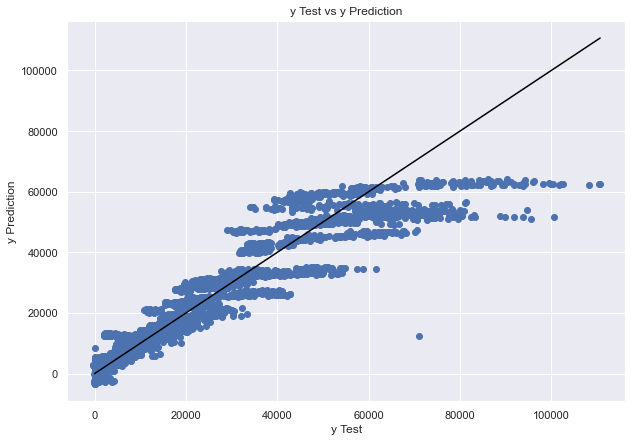

In [47]:
# Pick best parameters and model  
ridgemodel(store=0, alpha=1, plot=True)

In [48]:
%%time
ridgeregCV(1, [0.001, 0.01, 0.1, 1, 10, 100, 1000])

Ridge Regression - CV - alpha=0.001 - Store Type 1
Mean CV R2 training score = 0.65
Mean CV R2 testing score = 0.6559
Mean CV Root-mean-squared test score = 9718


Ridge Regression - CV - alpha=0.01 - Store Type 1
Mean CV R2 training score = 0.65
Mean CV R2 testing score = 0.6579
Mean CV Root-mean-squared test score = 9693


Ridge Regression - CV - alpha=0.1 - Store Type 1
Mean CV R2 training score = 0.65
Mean CV R2 testing score = 0.6678
Mean CV Root-mean-squared test score = 9572


Ridge Regression - CV - alpha=1 - Store Type 1
Mean CV R2 training score = 0.6499
Mean CV R2 testing score = 0.6767
Mean CV Root-mean-squared test score = 9456


Ridge Regression - CV - alpha=10 - Store Type 1
Mean CV R2 training score = 0.6492
Mean CV R2 testing score = 0.6805
Mean CV Root-mean-squared test score = 9405


Ridge Regression - CV - alpha=100 - Store Type 1
Mean CV R2 training score = 0.642
Mean CV R2 testing score = 0.6825
Mean CV Root-mean-squared test score = 9380


Ridge Regression - CV -

Ridge Regression - alpha=100 - Store Type 1
R2 training score = 0.6403
R2 testing score = 0.7252
Root-mean-squared test score = 8302.0


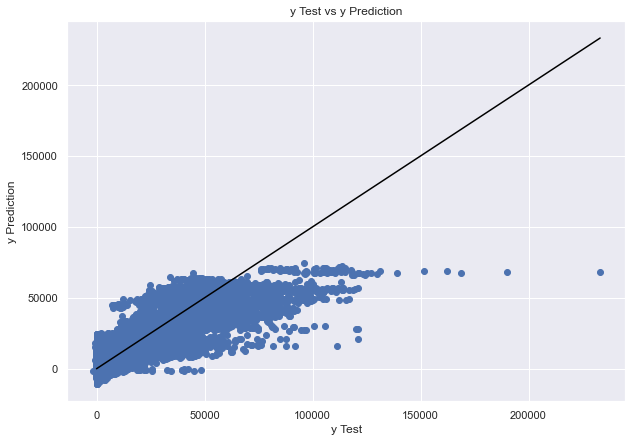

In [49]:
# Pick best parameters and model  
ridgemodel(store=1, alpha=100, plot=True)

In [50]:
%%time
ridgeregCV(2, [0.001, 0.01, 0.1, 1, 10, 100, 1000])

Ridge Regression - CV - alpha=0.001 - Store Type 2
Mean CV R2 training score = 0.7993
Mean CV R2 testing score = 0.8166
Mean CV Root-mean-squared test score = 11174


Ridge Regression - CV - alpha=0.01 - Store Type 2
Mean CV R2 training score = 0.7993
Mean CV R2 testing score = 0.8168
Mean CV Root-mean-squared test score = 11169


Ridge Regression - CV - alpha=0.1 - Store Type 2
Mean CV R2 training score = 0.7993
Mean CV R2 testing score = 0.8173
Mean CV Root-mean-squared test score = 11151


Ridge Regression - CV - alpha=1 - Store Type 2
Mean CV R2 training score = 0.7993
Mean CV R2 testing score = 0.8177
Mean CV Root-mean-squared test score = 11141


Ridge Regression - CV - alpha=10 - Store Type 2
Mean CV R2 training score = 0.799
Mean CV R2 testing score = 0.8176
Mean CV Root-mean-squared test score = 11145


Ridge Regression - CV - alpha=100 - Store Type 2
Mean CV R2 training score = 0.7936
Mean CV R2 testing score = 0.8117
Mean CV Root-mean-squared test score = 11324


Ridge Regre

Ridge Regression - alpha=10 - Store Type 2
R2 training score = 0.7973
R2 testing score = 0.8357
Root-mean-squared test score = 10568.0


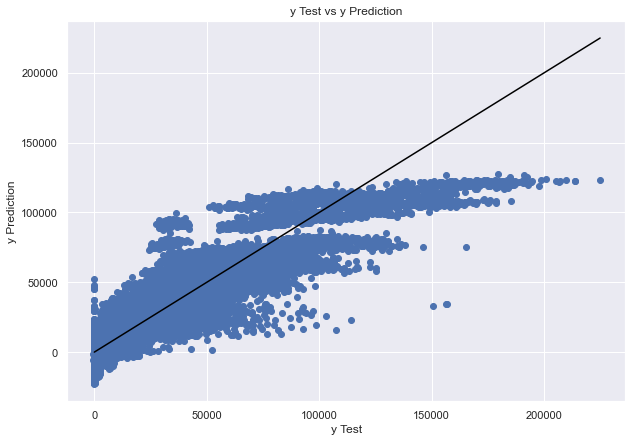

In [51]:
# Pick best parameters and model  
ridgemodel(store=2, alpha=10, plot=True)

#### Let's try Random Forest and see how it does

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Define function for performing random forest cross validation for tuning of max_depth

def rfCV(store, tuneparam=None, param_value=None, max_depth=None, min_samples_split=2, min_samples_leaf=1, \
         min_weight_fraction_leaf=0, n_jobs=-1, max_features='auto', table=False):
    if param_value == None:
        
        rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split, \
                                      min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction, \
                                      max_features=max_features, n_jobs=n_jobs)
        
        print('Random Forest Regression - CV - Store Type ' + str(store))
        print('max_depth = ' + str(max_depth))
        print('min_samples_split = ' + str(min_samples_split))
        print('min_samples_leaf = ' + str(min_samples_leaf))
        print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
        print('max_features = ' + str(max_features))
        
        if store == 0:
            X_train, y_train, X_test, y_test = cvX_train0, cvy_train0, cvX_test0, cvy_test0
        elif store ==1:
            X_train, y_train, X_test, y_test = cvX_train1, cvy_train1, cvX_test1, cvy_test1
        else:
            X_train, y_train, X_test, y_test = cvX_train2, cvy_train2, cvX_test2, cvy_test2
            
        cvmodeling(rfreg, X_train, y_train, X_test, y_test, table)
        print('\n')
        
    else:
        for i in param_value:
        
            if tuneparam == 'max_depth':
                rfreg = RandomForestRegressor(random_state=42, max_depth=i, min_samples_split=min_samples_split, \
                                              min_samples_leaf=min_samples_leaf, \
                                              min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                              max_features=max_features, n_jobs=n_jobs)
                print('Random Forest Regression - CV - Store Type ' + str(store))
                print('max_depth = ' + str(i))
                print('min_samples_split = ' + str(min_samples_split))
                print('min_samples_leaf = ' + str(min_samples_leaf))
                print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
                print('max_features = ' + str(max_features))                
                
            elif tuneparam == 'min_samples_split':
                rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, \
                                              min_samples_split=i, \
                                              min_samples_leaf=min_samples_leaf, \
                                              min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                              max_features=max_features, n_jobs=n_jobs)
                print('Random Forest Regression - CV - Store Type ' + str(store))
                print('max_depth = ' + str(max_depth))
                print('min_samples_split = ' + str(i))
                print('min_samples_leaf = ' + str(min_samples_leaf))
                print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
                print('max_features = ' + str(max_features))
                
            elif tuneparam == 'min_samples_leaf':
                rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, \
                                              min_samples_split=min_samples_split, \
                                              min_samples_leaf=i, \
                                              min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                              max_features=max_features, n_jobs=n_jobs)
                print('Random Forest Regression - CV - Store Type ' + str(store))
                print('max_depth = ' + str(max_depth))
                print('min_samples_split = ' + str(min_samples_split))
                print('min_samples_leaf = ' + str(i))
                print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
                print('max_features = ' + str(max_features))  
                
            elif tuneparam == 'min_weight_fraction_leaf':
                rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, \
                                              min_samples_split=min_samples_split, \
                                              min_samples_leaf=min_samples_leaf, \
                                              min_weight_fraction_leaf=i, \
                                              max_features=max_features, n_jobs=n_jobs)
                print('Random Forest Regression - CV - Store Type ' + str(store))
                print('max_depth = ' + str(max_depth))
                print('min_samples_split = ' + str(min_samples_split))
                print('min_samples_leaf = ' + str(min_samples_leaf))
                print('min_weight_fraction_leaf = ' + str(i))
                print('max_features = ' + str(max_features))
                
            elif tuneparam == 'max_features':
                rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, \
                                              min_samples_split=min_samples_split, \
                                              min_samples_leaf=min_samples_leaf, \
                                              min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                              max_features=i, n_jobs=n_jobs)
                print('Random Forest Regression - CV - Store Type ' + str(store))
                print('max_depth = ' + str(max_depth))
                print('min_samples_split = ' + str(min_samples_split))
                print('min_samples_leaf = ' + str(min_samples_leaf))
                print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
                print('max_features = ' + str(i))
            
       
            if store == 0:
                X_train, y_train, X_test, y_test = cvX_train0, cvy_train0, cvX_test0, cvy_test0
            elif store ==1:
                X_train, y_train, X_test, y_test = cvX_train1, cvy_train1, cvX_test1, cvy_test1
            else:
                X_train, y_train, X_test, y_test = cvX_train2, cvy_train2, cvX_test2, cvy_test2
            
            cvmodeling(rfreg, X_train, y_train, X_test, y_test, table)
            print('\n')

In [48]:
# Define function for modeling random forest regression on full training data after CV hypterparameter tuning

def rfmodel(store, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, \
            max_features='auto', n_jobs=-1, plot=True):
    
    rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, \
                                  min_samples_split=min_samples_split, \
                                  min_samples_leaf=min_samples_leaf, \
                                  min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                  max_features=max_features, n_jobs=n_jobs)
    
    print('Random Forest Regression - Store Type ' + str(store))
    print('max_depth = ' + str(max_depth))
    print('min_samples_split = ' + str(min_samples_split))
    print('min_samples_leaf = ' + str(min_samples_leaf))
    print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
    print('max_features = ' + str(max_features))
    
    if store == 0:
        X_train, y_train, X_test, y_test = X_train0, y_train0, X_test0, y_test0
    elif store ==1:
        X_train, y_train, X_test, y_test = X_train1, y_train1, X_test1, y_test1
    else:
        X_train, y_train, X_test, y_test = X_train2, y_train2, X_test2, y_test2
    modeling(rfreg, X_train, np.ravel(y_train), X_test, np.ravel(y_test), plot)

Store Type 0

In [62]:
%%time
# CV hyperparameter tuning of max_depth for Store Type 0
rfCV(store=0, tuneparam='max_depth', param_value=[20, 40, 60, 80, 100, None])

Random Forest Regression - CV - max_depth=20 - Store Type 0
Mean CV R2 training score = 0.9893
Mean CV R2 testing score = 0.9749
Mean CV Root-mean-squared test score = 2494


Random Forest Regression - CV - max_depth=40 - Store Type 0
Mean CV R2 training score = 0.9921
Mean CV R2 testing score = 0.9767
Mean CV Root-mean-squared test score = 2400


Random Forest Regression - CV - max_depth=60 - Store Type 0
Mean CV R2 training score = 0.9975
Mean CV R2 testing score = 0.9805
Mean CV Root-mean-squared test score = 2190


Random Forest Regression - CV - max_depth=80 - Store Type 0
Mean CV R2 training score = 0.9981
Mean CV R2 testing score = 0.9808
Mean CV Root-mean-squared test score = 2169


Random Forest Regression - CV - max_depth=100 - Store Type 0
Mean CV R2 training score = 0.9981
Mean CV R2 testing score = 0.9808
Mean CV Root-mean-squared test score = 2169


Random Forest Regression - CV - max_depth=None - Store Type 0
Mean CV R2 training score = 0.9981
Mean CV R2 testing score = 

Let's use max_depth = 60

In [63]:
%%time
# CV hyperparameter tuning of min_samples_split for Store Type 0
rfCV(store=0, tuneparam='min_samples_split', param_value=[2, 5, 10, 15, 20, 25, 30, 35, 40], max_depth=60)

Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9975
Mean CV R2 testing score = 0.9805
Mean CV Root-mean-squared test score = 2190


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 5
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9969
Mean CV R2 testing score = 0.9804
Mean CV Root-mean-squared test score = 2194


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9957
Mean CV R2 testing score = 0.9806
Mean CV Root-mean-squared test score = 2184


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 15
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9945
Mean CV R2

Let's use min_samples_split = 10

In [67]:
%%time
# CV hyperparameter tuning of min_samples_leaf for Store Type 0
rfCV(store=0, tuneparam='min_samples_leaf', param_value=[1, 5, 10, 15, 20], max_depth=60, min_samples_split=10)

Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9957
Mean CV R2 testing score = 0.9806
Mean CV Root-mean-squared test score = 2184


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 5
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9917
Mean CV R2 testing score = 0.9788
Mean CV Root-mean-squared test score = 2283


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 10
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9888
Mean CV R2 testing score = 0.978
Mean CV Root-mean-squared test score = 2325


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 15
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9875
Mean CV

Let's use min_samples_leaf = 1

In [71]:
%%time
# CV hyperparameter tuning of min_weight_fraction_leaf for Store Type 0
rfCV(store=0, tuneparam='min_weight_fraction_leaf', param_value=[0, 0.0001, 0.0005, 0.001, 0.005], max_depth=60, \
     min_samples_split=10, min_samples_leaf=1)

Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9957
Mean CV R2 testing score = 0.9806
Mean CV Root-mean-squared test score = 2184


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0001
max_features = auto
Mean CV R2 training score = 0.9945
Mean CV R2 testing score = 0.98
Mean CV Root-mean-squared test score = 2214


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0005
max_features = auto
Mean CV R2 training score = 0.9907
Mean CV R2 testing score = 0.9784
Mean CV Root-mean-squared test score = 2305


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0.001
max_features = auto
Mean CV R2 training score = 0.9

We'll leave min_weight_fraction_leaf = 0

In [72]:
%%time
# CV hyperparameter tuning of max_depth for Store Type 0
rfCV(store=0, tuneparam='max_features', param_value=['auto', 'sqrt', 'log2'], max_depth=60, \
     min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0)

Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9957
Mean CV R2 testing score = 0.9806
Mean CV Root-mean-squared test score = 2184


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = sqrt
Mean CV R2 training score = 0.9899
Mean CV R2 testing score = 0.9747
Mean CV Root-mean-squared test score = 2505


Random Forest Regression - CV - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = log2
Mean CV R2 training score = 0.9769
Mean CV R2 testing score = 0.957
Mean CV Root-mean-squared test score = 3269


Wall time: 1min 6s


We'll leave max_features as 'auto'

Random Forest Regression - Store Type 0
max_depth = 60
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
R2 training score = 0.9953
R2 testing score = 0.9778
Root-mean-squared test score = 2441.0


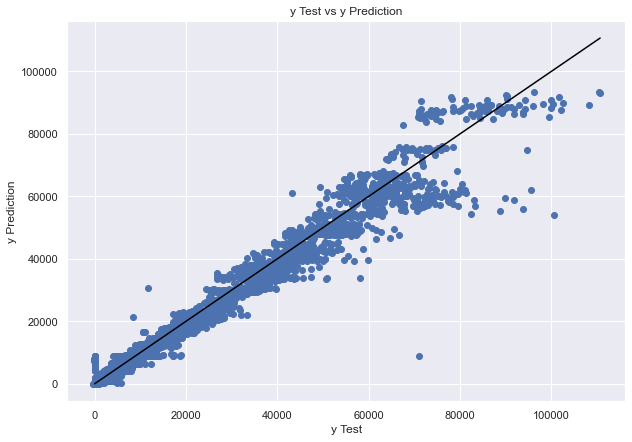

Wall time: 18.2 s


In [75]:
%%time
# Model full training data for Store Type 0
rfmodel(0, max_depth=60, min_samples_split=10)

Store Type 1

In [76]:
%%time
# CV hyperparameter tuning of max_depth for Store Type 1
rfCV(store=1, tuneparam='max_depth', param_value=[20, 40, 60, 80, 100, None])

Random Forest Regression - CV - Store Type 1
max_depth = 20
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.8677
Mean CV R2 testing score = 0.8024
Mean CV Root-mean-squared test score = 7243


Random Forest Regression - CV - Store Type 1
max_depth = 40
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9543
Mean CV R2 testing score = 0.8645
Mean CV Root-mean-squared test score = 5730


Random Forest Regression - CV - Store Type 1
max_depth = 60
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.968
Mean CV R2 testing score = 0.8672
Mean CV Root-mean-squared test score = 5538


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.983
Mean CV R2 tes

Let's use max_depth = 80

In [78]:
%%time
# CV hyperparameter tuning of min_samples_split for Store Type 1
rfCV(store=1, tuneparam='min_samples_split', param_value=[2, 5, 10, 15, 20, 25, 30, 35, 40], max_depth=80)

Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.983
Mean CV R2 testing score = 0.8699
Mean CV Root-mean-squared test score = 5349


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 5
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9779
Mean CV R2 testing score = 0.8802
Mean CV Root-mean-squared test score = 5191


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9645
Mean CV R2 testing score = 0.8814
Mean CV Root-mean-squared test score = 5222


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 15
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9493
Mean CV R2 

In [79]:
notify.send('Completed CV tuning of min_samples_split for Store Type 1')

min_samples_split=35 worked well

Let's try keeping min_samples_split = 2 and doing the CV tuning on min_samples_leaf

In [83]:
%%time
# CV hyperparameter tuning of min_samples_leaf for Store Type 1
rfCV(store=1, tuneparam='min_samples_leaf', param_value=[5, 10, 15, 20], max_depth=80, min_samples_split=2)

Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 5
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9419
Mean CV R2 testing score = 0.8813
Mean CV Root-mean-squared test score = 5424


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 10
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9062
Mean CV R2 testing score = 0.8524
Mean CV Root-mean-squared test score = 6031


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 15
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.8774
Mean CV R2 testing score = 0.8129
Mean CV Root-mean-squared test score = 6685


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 2
min_samples_leaf = 20
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.8607
Mean CV R

Let's leaft min_samples_leaf=1 and set min_samples_split=35

In [41]:
%%time
# CV hyperparameter tuning of min_weight_fraction_leaf for Store Type 1
rfCV(store=1, tuneparam='min_weight_fraction_leaf', param_value=[0.0001, 0.0005, 0.001, 0.005], max_depth=80, \
     min_samples_split=35, min_samples_leaf=1)

Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0001
max_features = auto
Mean CV R2 training score = 0.9104
Mean CV R2 testing score = 0.8865
Mean CV Root-mean-squared test score = 5427


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0005
max_features = auto
Mean CV R2 training score = 0.8517
Mean CV R2 testing score = 0.7925
Mean CV Root-mean-squared test score = 7143


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0.001
max_features = auto
Mean CV R2 training score = 0.751
Mean CV R2 testing score = 0.6868
Mean CV Root-mean-squared test score = 9099


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0.005
max_features = auto
Mean CV R2 training score 

Leaving min_weight_fraction_leaf=0

In [43]:
%%time
# CV hyperparameter tuning of max_depth for Store Type 1
rfCV(store=1, tuneparam='max_features', param_value=['auto', 'sqrt', 'log2'], max_depth=80, \
     min_samples_split=35, min_samples_leaf=1, min_weight_fraction_leaf=0)

Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9305
Mean CV R2 testing score = 0.9009
Mean CV Root-mean-squared test score = 5049


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = sqrt
Mean CV R2 training score = 0.8883
Mean CV R2 testing score = 0.8715
Mean CV Root-mean-squared test score = 5818


Random Forest Regression - CV - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = log2
Mean CV R2 training score = 0.8598
Mean CV R2 testing score = 0.8541
Mean CV Root-mean-squared test score = 6249


Wall time: 6min 10s


Leaving max_features='auto'

Random Forest Regression - Store Type 1
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
R2 training score = 0.9369
R2 testing score = 0.8427
Root-mean-squared test score = 6281.0


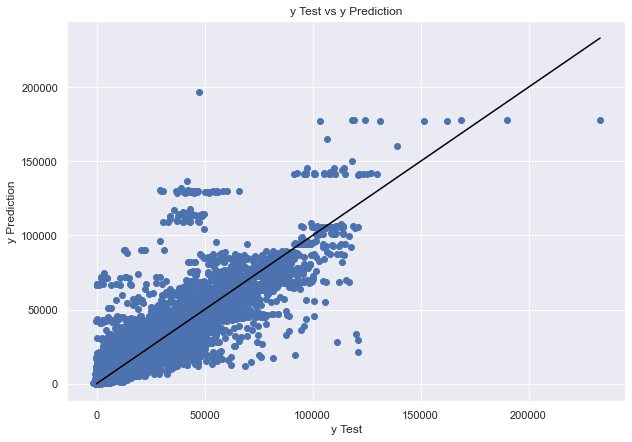

Wall time: 1min 56s


In [85]:
%%time
# Model full training data for Store Type 1
rfmodel(1, max_depth=80, min_samples_split=35)

Not bad, but we'll try to improve it through additional measures later


Store Type 2

It seems like max_depth and min_samples_split are the two main parameters to tune. Will only focus on those for Store Type 2

In [46]:
%%time
# CV hyperparameter tuning of max_depth for Store Type 2
rfCV(store=2, tuneparam='max_depth', param_value=[40, 60, 80, 100, None])

Random Forest Regression - CV - Store Type 2
max_depth = 40
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9674
Mean CV R2 testing score = 0.9362
Mean CV Root-mean-squared test score = 6480


Random Forest Regression - CV - Store Type 2
max_depth = 60
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9803
Mean CV R2 testing score = 0.9434
Mean CV Root-mean-squared test score = 6062


Random Forest Regression - CV - Store Type 2
max_depth = 80
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.99
Mean CV R2 testing score = 0.9488
Mean CV Root-mean-squared test score = 5748


Random Forest Regression - CV - Store Type 2
max_depth = 100
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9943
Mean CV R2 te

Let's use max_depth = 100

*I am running on my laptop with 2 cores rather than my desktop with 4. To maintain CPU temp I'm setting n_jobs=-2 rather than n_jobs=-1. Will take significantly longer than it would on my desktop running with all cores in parallel.*

In [50]:
%%time
# CV hyperparameter tuning of min_samples_split for Store Type 2
rfCV(store=2, tuneparam='min_samples_split', param_value=[5, 10, 15, 20, 25, 30, 35, 40], max_depth=100, n_jobs=None)

Random Forest Regression - CV - Store Type 2
max_depth = 100
min_samples_split = 5
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9919
Mean CV R2 testing score = 0.9509
Mean CV Root-mean-squared test score = 5623


Random Forest Regression - CV - Store Type 2
max_depth = 100
min_samples_split = 10
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.986
Mean CV R2 testing score = 0.9507
Mean CV Root-mean-squared test score = 5638


Random Forest Regression - CV - Store Type 2
max_depth = 100
min_samples_split = 15
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9801
Mean CV R2 testing score = 0.9496
Mean CV Root-mean-squared test score = 5710


Random Forest Regression - CV - Store Type 2
max_depth = 100
min_samples_split = 20
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.9753
Mean C

Use min_samples_split = 5

Random Forest Regression - Store Type 2
max_depth = 100
min_samples_split = 5
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
R2 training score = 0.9934
R2 testing score = 0.9381
Root-mean-squared test score = 6486.0


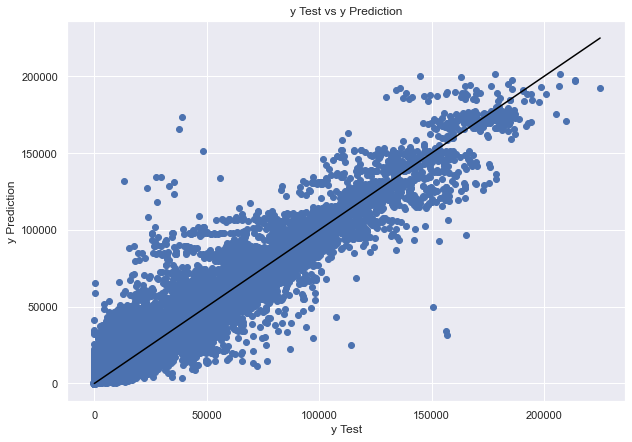

Wall time: 3min 15s


In [42]:
%%time
# Model full training data for Store Type 2
rfmodel(2, max_depth=100, min_samples_split=5, n_jobs=-1)

Pretty good!

#### Let's try reducing the dimensionality with PCA and then fitting Random Forest to improve Store Type 1 modeling

In [49]:
from sklearn.decomposition import PCA

In [50]:
# Define function for performing PCA transform prior to runnin CV on Default Random Forest
def pcaRfCV(store, n_components=[None], max_depth=None, min_samples_split=2, min_samples_leaf=1, \
            min_weight_fraction_leaf=0, max_features='auto', n_jobs=-1, table=False):
           
    if store == 0:
        X_train, y_train, X_test, y_test = cvX_train0, cvy_train0, cvX_test0, cvy_test0
    elif store ==1:
        X_train, y_train, X_test, y_test = cvX_train1, cvy_train1, cvX_test1, cvy_test1
    else:
        X_train, y_train, X_test, y_test = cvX_train2, cvy_train2, cvX_test2, cvy_test2
    
    for i in n_components:
        
        X_train0, X_train1, X_train2, X_train3, X_train4 = X_train[0], X_train[1], X_train[2], X_train[3], X_train[4]
        X_test0, X_test1, X_test2, X_test3, X_test4 = X_test[0], X_test[1], X_test[2], X_test[3], X_test[4]
             
        pca0 = PCA(random_state=42, n_components=i)
        pcaX_train0 = pca0.fit_transform(X_train0)
        pcaX_test0 = pca0.transform(X_test0)
        
        pca1 = PCA(random_state=42, n_components=i)
        pcaX_train1 = pca1.fit_transform(X_train1)
        pcaX_test1 = pca1.transform(X_test1)
        
        pca2 = PCA(random_state=42, n_components=i)
        pcaX_train2 = pca1.fit_transform(X_train2)
        pcaX_test2 = pca1.transform(X_test2)
        
        pca3 = PCA(random_state=42, n_components=i)
        pcaX_train3 = pca1.fit_transform(X_train3)
        pcaX_test3 = pca1.transform(X_test3)
        
        pca4 = PCA(random_state=42, n_components=i)
        pcaX_train4 = pca4.fit_transform(X_train4)
        pcaX_test4 = pca4.transform(X_test4)
        
        pcaX_train = [pcaX_train0, pcaX_train1, pcaX_train2, pcaX_train3, pcaX_train4]
        pcaX_test = [pcaX_test0, pcaX_test1, pcaX_test2, pcaX_test3, pcaX_test4]
         
        rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split, \
                                      min_samples_leaf=min_samples_leaf, \
                                      min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                      max_features=max_features, n_jobs=n_jobs)
        
        print('PCA Transformed - Random Forest Regression - Store Type ' + str(store))
        print('n_components = ' + str(i))
        print('max_depth = ' + str(max_depth))
        print('min_samples_split = ' + str(min_samples_split))
        print('min_samples_leaf = ' + str(min_samples_leaf))
        print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
        print('max_features = ' + str(max_features))      
        
        cvmodeling(rfreg, pcaX_train, y_train, pcaX_test, y_test, False)
        print('\n')

In [51]:
def pcaRfModel(store, n_components=[None], max_depth=None, min_samples_split=2, min_samples_leaf=1, \
               min_weight_fraction_leaf=0, max_features='auto', n_jobs=-1, plot=True):
    pca = PCA(n_components=n_components, random_state=42)    
    
    if store == 0:
        X_train, y_train, X_test, y_test = X_train0, y_train0, X_test0, y_test0
    elif store ==1:
        X_train, y_train, X_test, y_test = X_train1, y_train1, X_test1, y_test1
    else:
        X_train, y_train, X_test, y_test = X_train2, y_train2, X_test2, y_test2
        
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    rfreg = RandomForestRegressor(random_state=42, max_depth=max_depth, min_samples_split=min_samples_split, \
                                  min_samples_leaf=min_samples_leaf, \
                                  min_weight_fraction_leaf=min_weight_fraction_leaf, \
                                  max_features=max_features, n_jobs=n_jobs)
    
    print('PCA Transformed - Random Forest Regression - Store Type ' + str(store))
    print('n_components = ' + str(n_components))
    print('max_depth = ' + str(max_depth))
    print('min_samples_split = ' + str(min_samples_split))
    print('min_samples_leaf = ' + str(min_samples_leaf))
    print('min_weight_fraction_leaf = ' + str(min_weight_fraction_leaf))
    print('max_features = ' + str(max_features))
    
    modeling(rfreg, X_train, np.ravel(y_train), X_test, np.ravel(y_test), plot)

In [66]:
%%time
pcaRfCV(1, [20, 40, 60, 80, 100, 120, 140], max_depth=80, min_samples_split=35, n_jobs=-2)

PCA Transformed - Random Forest Regression - Store Type 1
n_components = 20
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.504
Mean CV R2 testing score = -0.4317
Mean CV Root-mean-squared test score = 19681


PCA Transformed - Random Forest Regression - Store Type 1
n_components = 40
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.6437
Mean CV R2 testing score = 0.0307
Mean CV Root-mean-squared test score = 16323


PCA Transformed - Random Forest Regression - Store Type 1
n_components = 60
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.923
Mean CV R2 testing score = 0.8483
Mean CV Root-mean-squared test score = 6449


PCA Transformed - Random Forest Regression - Store Type 1
n_components = 80
max_depth = 80
min_samples

In [47]:
%%time
pcaRfCV(1, [None], max_depth=80, min_samples_split=35, n_jobs=-1)

PCA Transformed - Random Forest Regression - Store Type 1
n_components = None
max_depth = 80
min_samples_split = 35
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
Mean CV R2 training score = 0.92
Mean CV R2 testing score = 0.8778
Mean CV Root-mean-squared test score = 5772


Wall time: 19min 34s


PCA Transformed - Random Forest Regression - Store Type 1
n_components = None
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0
max_features = auto
R2 training score = 0.9903
R2 testing score = 0.8985
Root-mean-squared test score = 5045.0


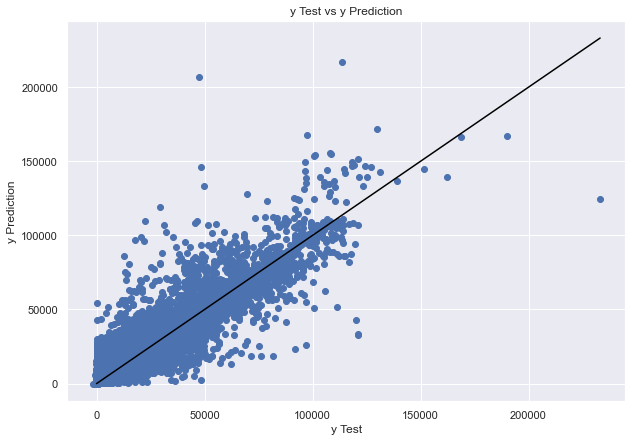

Wall time: 7min 59s


In [51]:
%%time
pcaRfModel(1, None, n_jobs=-1)

Better than Random Forest alone

#### Fit final models for use

In [59]:
# Store Type 0 model:
model0 = RandomForestRegressor(max_depth=60, min_samples_split=10, n_jobs=-2)
model0.fit(X_train0, np.ravel(y_train0))

RandomForestRegressor(max_depth=60, min_samples_split=10, n_jobs=-2)

In [53]:
# Store Type 1 model:
from sklearn.pipeline import Pipeline
model1 = Pipeline([('PCA', PCA(n_components=None)), \
                   ('Random Forest Regresion', RandomForestRegressor(n_jobs=-2))])
model1.fit(X_train1, np.ravel(y_train1))

Pipeline(steps=[('PCA', PCA()),
                ('Random Forest Regresion', RandomForestRegressor(n_jobs=-2))])

In [60]:
# Store Type 2 model:
model2 = RandomForestRegressor(max_depth=100, min_samples_split=5, n_jobs=-2)
model2.fit(X_train2, np.ravel(y_train2))

RandomForestRegressor(max_depth=100, min_samples_split=5, n_jobs=-2)

#### Final Metrics

In [66]:
y_pred0 = model0.predict(X_test0)
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

Store Type 0 Model Results
R2 training score = 0.9952
R2 testing score = 0.9773
Root-mean-squared test score = 2467.0


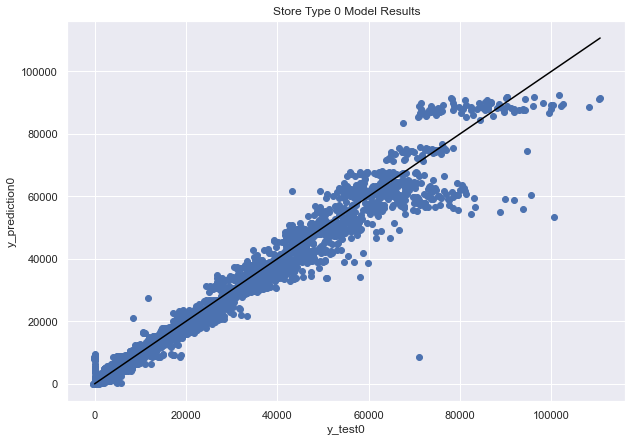

In [82]:
# Store Type 0
print('Store Type 0 Model Results')
print('R2 training score = ' + str(round(model0.score(X_train0, y_train0), 4)))
print('R2 testing score = ' + str(round(r2_score(y_test0, y_pred0), 4)))
print('Root-mean-squared test score = ' + str(round(mean_squared_error(y_test0, y_pred0, squared=False))))

_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(np.ravel(y_test0), y_pred0)
_ = plt.plot([1, y_test0.max()], [1, y_test0.max()], c='black')
plt.xlabel('y_test0')
plt.ylabel('y_prediction0')
plt.title('Store Type 0 Model Results')
_ = plt.show()

Store Type 1 Model Results
R2 training score = 0.9906
R2 testing score = 0.8857
Root-mean-squared test score = 5354.0


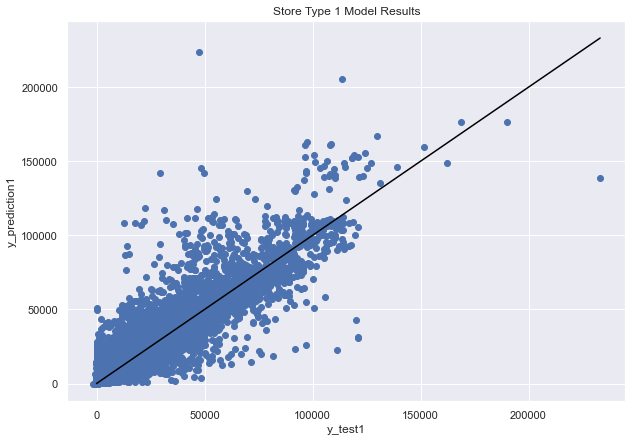

In [81]:
# Store Type 1
print('Store Type 1 Model Results')
print('R2 training score = ' + str(round(model1.score(X_train1, y_train1), 4)))
print('R2 testing score = ' + str(round(r2_score(y_test1, y_pred1), 4)))
print('Root-mean-squared test score = ' + str(round(mean_squared_error(y_test1, y_pred1, squared=False))))

_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(np.ravel(y_test1), y_pred1)
_ = plt.plot([1, y_test1.max()], [1, y_test1.max()], c='black')
plt.xlabel('y_test1')
plt.ylabel('y_prediction1')
plt.title('Store Type 1 Model Results')
_ = plt.show()

Store Type 2 Model Results
R2 training score = 0.9935
R2 testing score = 0.9377
Root-mean-squared test score = 6506.0


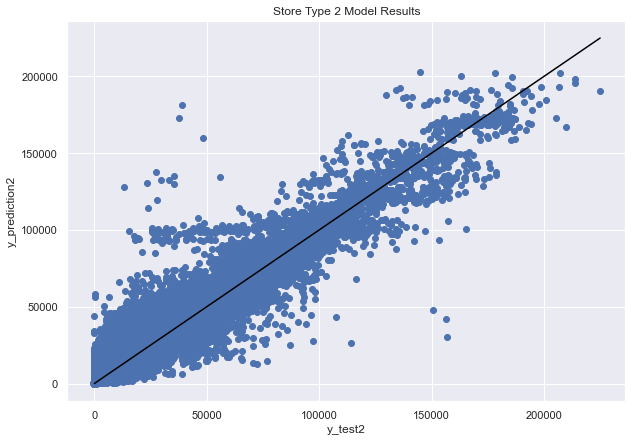

In [80]:
# Store Type 2

print('Store Type 2 Model Results')
print('R2 training score = ' + str(round(model2.score(X_train2, y_train2), 4)))
print('R2 testing score = ' + str(round(r2_score(y_test2, y_pred2), 4)))
print('Root-mean-squared test score = ' + str(round(mean_squared_error(y_test2, y_pred2, squared=False))))

_ = plt.figure(figsize=(10, 7))
_ = plt.scatter(np.ravel(y_test2), y_pred2)
_ = plt.plot([1, y_test2.max()], [1, y_test2.max()], c='black')
plt.xlabel('y_test2')
plt.ylabel('y_prediction2')
plt.title('Store Type 2 Model Results')
_ = plt.show()